In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/My Drive/Information_retrieval_project/IR_project_model_hyperbolic_hinge_5/" /content/

In [94]:
!cp -r "/content/drive/My Drive/Information_retrieval_project/IR_project_model_hyperbolic_hinge_5_2/" /content/

In [95]:
!unzip "/content/drive/My Drive/Information_retrieval_project/IR_project_model_hyperbolic_hinge_5_1.zip"

Archive:  /content/drive/My Drive/Information_retrieval_project/IR_project_model_hyperbolic_hinge_5_1.zip
replace IR_project_model_hyperbolic_hinge_5_1/tokenizer_config.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: IR_project_model_hyperbolic_hinge_5_1/tokenizer_config.json  
replace IR_project_model_hyperbolic_hinge_5_1/model_weights? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IR_project_model_hyperbolic_hinge_5_1/model_weights  y
y
y

replace IR_project_model_hyperbolic_hinge_5_1/special_tokens_map.json? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: IR_project_model_hyperbolic_hinge_5_1/special_tokens_map.json  
replace IR_project_model_hyperbolic_hinge_5_1/vocab.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: IR_project_model_hyperbolic_hinge_5_1/vocab.txt  


In [152]:
!unzip "/content/drive/My Drive/Information_retrieval_project/IR_project_model_hyperbolic_hinge_5_2.zip"

Archive:  /content/drive/My Drive/Information_retrieval_project/IR_project_model_hyperbolic_hinge_5_2.zip
replace IR_project_model_hyperbolic_hinge_5_2/tokenizer_config.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: IR_project_model_hyperbolic_hinge_5_2/tokenizer_config.json  
replace IR_project_model_hyperbolic_hinge_5_2/model_weights? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IR_project_model_hyperbolic_hinge_5_2/model_weights  y
y

replace IR_project_model_hyperbolic_hinge_5_2/special_tokens_map.json? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: IR_project_model_hyperbolic_hinge_5_2/special_tokens_map.json  
replace IR_project_model_hyperbolic_hinge_5_2/vocab.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: IR_project_model_hyperbolic_hinge_5_2/vocab.txt  


In [4]:
!pip install transformers==3.2.0

     |████████████████████████████████| 1.0MB 8.0MB/s 
     |████████████████████████████████| 901kB 16.9MB/s 
     |████████████████████████████████| 1.2MB 37.7MB/s 
     |████████████████████████████████| 3.0MB 55.6MB/s 


In [5]:
!pip install tensorflow==1.13.1


     |████████████████████████████████| 92.6MB 48kB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 368kB 57.4MB/s 
     |████████████████████████████████| 3.2MB 54.1MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [6]:
!pip install git+https://github.com/geoopt/geoopt.git
! pip install git+https://github.com/ferrine/hyrnn.git

  Cloning https://github.com/geoopt/geoopt.git to /tmp/pip-req-build-o_uyx5qm
  Running command git clone -q https://github.com/geoopt/geoopt.git /tmp/pip-req-build-o_uyx5qm
  Created wheel for geoopt: filename=geoopt-0.3.1-cp37-none-any.whl size=76194 sha256=6cdb19a1efaceeb4fc2bdecf0424c12bc45d37a3f027f91f6c214a5e4d04b9dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-bde9_5nn/wheels/10/df/30/e0d857f034c142ca5f38af048b62aae3da773b272553e5dd21
Successfully built geoopt
  Cloning https://github.com/ferrine/hyrnn.git to /tmp/pip-req-build-odmd11t4
  Running command git clone -q https://github.com/ferrine/hyrnn.git /tmp/pip-req-build-odmd11t4
  Created wheel for hyrnn: filename=hyrnn-0.0.0-cp37-none-any.whl size=13955 sha256=6ed75d4f97093e6c3810dfae3d1b3da0832e6eaaa53647aaca1f786cb9904268
  Stored in directory: /tmp/pip-ephem-wheel-cache-xpe4ebjz/wheels/24/c3/64/cc0e9d25d466081dc154a2a8843157f54d845b916b4ba66418
Successfully built hyrnn


In [7]:
!cp "/content/drive/MyDrive/Information_retrieval_project/QC_science/train_QC_data.csv" /content
!cp "/content/drive/MyDrive/Information_retrieval_project/QC_science/test_QC_data.csv" /content
!cp "/content/drive/MyDrive/Information_retrieval_project/QC_science/val_QC_data.csv" /content


In [8]:
import pandas as pd
train_data = pd.read_csv("train_QC_data.csv")
val_data = pd.read_csv("val_QC_data.csv")
test_data = pd.read_csv("test_QC_data.csv")

train_data


,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,grade,year,QCLabel,Question,subject,category,fold
0,VASoL_2008_3_34,34,1,C,1,0,Virginia Standards of Learning - Science,3,2008,matter_properties of objects_TEXT,A student is asked to bring something that fee...,NaN,Train,Easy
1,MCAS_2015_8_6,6,1,B,1,0,MCAS,8,2015,celestial_FEATURES_STELLAR,Which of the following statements best describ...,NaN,Test,Easy
2,Mercury_SC_417677,417677,1,B,1,0,Mercury,4,2015,energy_LIGHT_REFLECT,A polished metal ball looks very shiny and bri...,NaN,Test,Challenge
3,Mercury_7230423,7230423,1,A,1,0,Mercury,9,2015,LIFE_EXTINCTION_MASSEX,Which was a main force driving extensive speci...,NaN,Test,Easy
4,NYSEDREGENTS_2007_8_6,6,1,2,1,0,NYSEDREGENTS,8,2007,Life_functions_features and functions_CELLBIO_...,Compared to the amount of hereditary informati...,NaN,Train,Challenge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,Mercury_402502,402502,1,D,1,0,Mercury,8,2015,matter_chemistry_periodic table,"According to the periodic table, argon is foun...",NaN,Test,Challenge
5593,MCAS_2006_9_20,20,1,B,1,0,MCAS,9,2006,FOR_MOMENTUM,Which of the following has the least momentum?...,NaN,Train,Challenge
5594,NYSEDREGENTS_2013_8_35,35,1,4,1,0,NYSEDREGENTS,8,2013,Life_functions_features and functions_PLANT_PH...,The amount of which greenhouse gas in the air ...,NaN,Test,Easy
5595,Mercury_7082670,7082670,1,C,1,0,Mercury,7,2015,energy_LIGHT_electromagnetic spectrum,The visible light spectrum can be subdivided a...,NaN,Test,Easy


In [9]:
set(train_data["Question"].values).intersection(set(val_data["Question"].values))

set()

In [10]:
from google.colab import files

In [11]:
import re
def clean_sentence(question):
  # print(question)
  question = re.sub('<[^>]*>', ' ',question)
  question = re.sub(' +', ' ', question)
  question = re.sub('\xa0','',question)
  question = question.rstrip()
  question = re.sub('nan','',question)
  question = re.sub(u'\u2004','',question)
  question = re.sub(u'\u2009','',question)

  # question = question.decode("utf-8")
  # question = question.replace(u'\u200\d*','').encode("utf-8")
  question = re.sub('&nbsp','',question)
  question = re.sub('&ndash','',question)
  question = re.sub('\r','',question)
  question = re.sub('\t','',question)
  question = re.sub('\n',' ',question)

  question = re.sub('MathType@.*','',question)
  question = re.sub('&thinsp','',question)
  question = re.sub('&times','',question)
  question = re.sub('\u200b','',question)
  question = re.sub('&rarr;;;','',question)

  return question

In [12]:
# final_data_1 = final_data.loc[0:71003,:]
# final_data_1

In [13]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Loading BERT tokenizer...


In [14]:
train_data["QCLabel"].value_counts()

celestial_cycles                                                106
matter_chemistry_periodic table                                  85
matter_chemistry_atomic                                          79
matter_CHANGES_CHEMICAL                                          72
science_INFERENCE_observation                                    69
                                                               ... 
EARTH_INNER_PLATE                                                 1
LIFE_environment and adaptation_ADAP                              1
matter_Change of state_EVAPoration                                1
Life_functions_features and functions_CELLBIO_STRUCT_VACUOLE      1
energy_ELEC_ELECTROMAGNETS_energy_devices                         1
Name: QCLabel, Length: 416, dtype: int64

In [15]:

# from sklearn.preprocessing import LabelEncoder

# LE = LabelEncoder()
# final_data['label'] = LE.fit_transform(final_data['board_syllabus'])
# final_data.head()

In [16]:
# def get_labels(prediction):
#     predicted_label =  LE.inverse_transform([prediction])
#     return predicted_label[0]

In [17]:
# get_labels(330)

In [18]:




# train_data = pd.concat([train_data,val_data])
# train_data

In [19]:
train_features = train_data["Question"]
test_features = test_data["Question"]
train_labels = train_data["QCLabel"]
test_labels = test_data["QCLabel"]
val_features = val_data["Question"]
val_labels = val_data["QCLabel"]

In [20]:
train_labels.value_counts()

celestial_cycles                                                106
matter_chemistry_periodic table                                  85
matter_chemistry_atomic                                          79
matter_CHANGES_CHEMICAL                                          72
science_INFERENCE_observation                                    69
                                                               ... 
EARTH_INNER_PLATE                                                 1
LIFE_environment and adaptation_ADAP                              1
matter_Change of state_EVAPoration                                1
Life_functions_features and functions_CELLBIO_STRUCT_VACUOLE      1
energy_ELEC_ELECTROMAGNETS_energy_devices                         1
Name: QCLabel, Length: 416, dtype: int64

In [21]:
test_labels.value_counts()

Life_reproduction_DNA inheritance_inheritance                    26
celestial_cycles                                                 26
Life_functions_features and functions_PLANT_PHOTOSYNTH           22
matter_chemistry_atomic                                          21
science_INFERENCE_experiment design                              19
                                                                 ..
LIFE_environment and adaptation_animal adaptations_BEHAV_HUNT     1
matter_measurement_instruments_RULER                              1
Life_cycle_GROWTH_DEF                                             1
Life_cycle_animal cycle_BIRD                                      1
matter_measurement_instruments_THERM                              1
Name: QCLabel, Length: 352, dtype: int64

In [22]:
question_answer = train_features.values
categories = train_labels.values

In [23]:
question_answer

array(['A student is asked to bring something that feels rough to class. Which would be BEST for him to bring? (A) Pillow (B) Marble (C) Sandpaper (D) Trading card',
       'Which of the following statements best describes the role of gravity in the formation of stars? (A) Gravity converts solid matter into gases and light energy. (B) Gravity causes gases and dust particles to condense into spheres. (C) Gravity cools gases and liquids until they become one solid mass. (D) Gravity pushes rocks and dust particles outward from a dense center.',
       'A polished metal ball looks very shiny and bright on a sunny day. What makes the ball look shiny? (A) The ball makes light. (B) The ball reflects light. (C) The ball absorbs light and then releases it. (D) The ball absorbs light and keeps it inside.',
       ...,
       'The amount of which greenhouse gas in the air will increase the most if large forests are cut down to be used for building materials without planting new trees in their pla

In [24]:
categories

array(['matter_properties of objects_TEXT', 'celestial_FEATURES_STELLAR',
       'energy_LIGHT_REFLECT', ...,
       'Life_functions_features and functions_PLANT_PHOTOSYNTH',
       'energy_LIGHT_electromagnetic spectrum',
       'Life_reproduction_DNA inheritance_DOMRECESS'], dtype=object)

In [25]:
# val_features = test_features.values
# val_labels = test_labels.values

In [26]:
# this method can be used to project from euclidean space to hyperbolic space
def exponential_map(vector):
        norm_v = np.linalg.norm(vector, axis=1)
        coef = np.tanh(norm_v) / norm_v
        second_term = vector * coef[:, None]
        return second_term

In [27]:
# this method can be used to project from euclidean space to hyperbolic space
def tensor_exponential_map(vector):
      vector_norm = vector.norm(dim=-1, p=2, keepdim=True).clamp_min(1e-15)
      gamma_1 = torch.nn.functional.tanh(vector_norm) * (vector / vector_norm)
      return gamma_1

In [33]:

import numpy as np

from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import HoverTool
from bokeh import colors

from gzip import open as gopen

import gensim.models.poincare as poincare
poincare_model = poincare.PoincareModel.load("taxonomy_embedding_20.pkl")
def get_poincare_embeddings_data(taxonomy):
  cleaned_taxonomy = []
  for value in taxonomy:
      value = value.split("_")
      cleaned_taxonomy.append( list(tok.lower() for tok in value) )
  return cleaned_taxonomy

In [34]:

# course_taxonomy

poincare_emb_data = get_poincare_embeddings_data(categories)
poincare_val = get_poincare_embeddings_data(val_labels)

In [35]:
# poincare_embedding =  [[ poincare_model.kv.get_vector(str(x)) for x in taxonomy ] for taxonomy in poincare_emb_data ]
# np.linalg.norm(poincare_embedding[1000])

In [36]:
# for index,embedding in enumerate(poincare_embedding):
#   poincare_embedding[index] = np.stack(embedding,axis=0)


In [37]:
# np.array(poincare_embedding).shape

In [38]:
poincare_embedding =  [exponential_map(np.expand_dims( np.hstack(  [ poincare_model.kv.get_vector(str(x)) for x in taxonomy ] ),axis=0)) for taxonomy in poincare_emb_data ]
np.linalg.norm(poincare_embedding[1000])

0.9132933197325185

In [39]:
poincare_embedding_val = [exponential_map(np.expand_dims( np.hstack(  [ poincare_model.kv.get_vector(str(x)) for x in taxonomy ] ),axis=0)) for taxonomy in poincare_val ]
np.linalg.norm(poincare_embedding_val[100])

0.7730004481210813

In [40]:
poincare_val[100]

['life', 'carbon cycle']

In [41]:
poincare_embedding_val[100].shape

(1, 40)

In [42]:
poincare_embedding[0].shape

(1, 60)

In [43]:
max_val_train = 0
max_emb =None
for embedding in poincare_embedding:
  val = embedding.shape[1]
  if val >max_val_train:
    max_val_train=val
    max_emb =embedding
max_val_train


160

In [44]:
max_val_val = 0
max_emb =None
for embedding in poincare_embedding_val:
  val = embedding.shape[1]
  if val >max_val_val:
    max_val_val=val
    max_emb =embedding
max_val_val


120

In [45]:
def get_concat_embedding(poincare_embedding,max_val):
  concatenated_embedding = []
  for embedding in poincare_embedding:
    if embedding.shape[1] < max_val:
      new_embedding = np.append(embedding, np.expand_dims(np.zeros(max_val-embedding.shape[1]),axis=0),axis=1)
    else:
      new_embedding = embedding
    concatenated_embedding.append(np.squeeze(new_embedding,axis=0))
  return concatenated_embedding



In [46]:
concat_embedding_train = get_concat_embedding(poincare_embedding,max_val_train)
concat_embedding_val = get_concat_embedding(poincare_embedding_val,max_val_train)

In [47]:
concat_embedding_train[0].shape

(160,)

In [48]:
poincare_embeddings_train = np.stack(concat_embedding_train, axis=0)
poincare_embeddings_train.shape

(5597, 160)

In [49]:
poincare_embeddings_val = np.stack(concat_embedding_val, axis=0).squeeze()
poincare_embeddings_val.shape

(778, 160)

In [50]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  A student is asked to bring something that feels rough to class. Which would be BEST for him to bring? (A) Pillow (B) Marble (C) Sandpaper (D) Trading card
Token IDs: tensor([  101,  1037,  3076,  2003,  2356,  2000,  3288,  2242,  2008,  5683,
         5931,  2000,  2465,  1012,  2029,  2052,  2022,  2190,  2005,  2032,
         2000,  3288,  1029,  1006,  1037,  1007, 10005,  1006,  1038,  1007,
         7720,  1006,  1039,  1007,  5472, 23298,  1006,  1040,  1007,  6202,
         4003,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,

In [51]:
input_ids_val = []
attention_masks_val = []

for sent in val_features:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  A student is asked to bring something that feels rough to class. Which would be BEST for him to bring? (A) Pillow (B) Marble (C) Sandpaper (D) Trading card
Token IDs: tensor([  101,  1037,  3076,  2003,  2356,  2000,  3288,  2242,  2008,  5683,
         5931,  2000,  2465,  1012,  2029,  2052,  2022,  2190,  2005,  2032,
         2000,  3288,  1029,  1006,  1037,  1007, 10005,  1006,  1038,  1007,
         7720,  1006,  1039,  1007,  5472, 23298,  1006,  1040,  1007,  6202,
         4003,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,

In [52]:
num_classes = len(list(set(categories)))
num_classes

416

In [53]:

from torch.utils.data import TensorDataset, random_split
train_poincare_tensor = torch.tensor(poincare_embeddings_train,dtype=torch.float)
val_poincare_tensor = torch.tensor(poincare_embeddings_val,dtype=torch.float)

val_dataset = TensorDataset(input_ids_val,attention_masks_val,val_poincare_tensor)
# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids, attention_masks, train_poincare_tensor)

# Create a 80-20train-validation split.

# Calculate the number of samples to include in each set.
# train_size = int(0.90 * len(dataset))
# val_size = len(dataset) - train_size

# # Divide the dataset by randomly selecting samples.
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# print('{:>5,} training samples'.format(train_size))
# print('{:>5,} validation samples'.format(val_size))

In [54]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [153]:
import numpy as np
from torch.autograd import Function
class Distance(Function):
    @staticmethod
    def grad(x, v, sqnormx, sqnormv, sqdist, eps):
        alpha = (1 - sqnormx)
        beta = (1 - sqnormv)
        z = 1 + 2 * sqdist / (alpha * beta)
        a = ((sqnormv - 2 * torch.sum(x * v, dim=-1) + 1) / torch.pow(alpha, 2))\
            .unsqueeze(-1).expand_as(x)
        a = a * x - v / alpha.unsqueeze(-1).expand_as(v)
        z = torch.sqrt(torch.pow(z, 2) - 1)
        z = torch.clamp(z * beta, min=eps).unsqueeze(-1)
        return 4 * a / z.expand_as(x)

    @staticmethod
    def forward(ctx, u, v, eps):
        squnorm = torch.clamp(torch.sum(u * u, dim=-1), 0, 1 - eps)
        sqvnorm = torch.clamp(torch.sum(v * v, dim=-1), 0, 1 - eps)
        sqdist = torch.sum(torch.pow(u - v, 2), dim=-1)
        ctx.eps = eps
        ctx.save_for_backward(u, v, squnorm, sqvnorm, sqdist)
        x = sqdist / ((1 - squnorm) * (1 - sqvnorm)) * 2 + 1
        # arcosh
        z = torch.sqrt(torch.pow(x, 2) - 1)
        return torch.log(x + z)

    @staticmethod
    def backward(ctx, g):
        u, v, squnorm, sqvnorm, sqdist = ctx.saved_tensors
        g = g.unsqueeze(-1)
        gu = Distance.grad(u, v, squnorm, sqvnorm, sqdist, ctx.eps)
        gv = Distance.grad(v, u, sqvnorm, squnorm, sqdist, ctx.eps)
        return g.expand_as(gu) * gu, g.expand_as(gv) * gv, None
def distanceTo(vector1,vector2):
        return Distance.apply(vector1,vector2,1e-5)
        # vector1 = vector1.detach().cpu().numpy()
        # vector2 = vector2.detach().cpu().numpy()
        # euclidean_dists = np.linalg.norm(vector1 - vector2)  
        # gamma = 1 + 2 * ((euclidean_dists ** 2) / ((1-(np.linalg.norm(vector1))) * (1-np.linalg.norm(vector2))))  # (1 + neg_size, batch_size)
        # poincare_dists = np.arccosh(gamma) 
        # return torch.tensor(poincare_dists,dtype=torch.float)

In [154]:

import sys
import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint
import geoopt.manifolds.stereographic.math as pm
import geoopt.optim.rsgd as rsgd_
import geoopt.optim.radam as radam_
# from hyrnn.nets import MobiusLinear
from geoopt.tensor import ManifoldParameter
from geoopt.manifolds.stereographic import PoincareBall
from tqdm import tqdm
import geoopt
import time
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint
import geoopt.optim.rsgd as rsgd_
import geoopt.optim.radam as radam_
# from hyrnn.nets import MobiusLinear
from geoopt.tensor import ManifoldParameter
import time
import argparse
cos = nn.CosineSimilarity(dim=0, eps=1e-6)

def create_ball(ball=None, c=None):
    """
    Helper to create a PoincareBall.
    Sometimes you may want to share a manifold across layers, e.g. you are using scaled PoincareBall.
    In this case you will require same curvature parameters for different layers or end up with nans.
    Parameters
    ----------
    ball : geoopt.PoincareBall
    c : float
    Returns
    -------
    geoopt.PoincareBall
    """
    if ball is None:
        assert c is not None, "curvature of the ball should be explicitly specified"
        ball = geoopt.PoincareBall(c)
    # else trust input
    return ball


class MobiusLinear(torch.nn.Linear):
    def __init__(self, *args, nonlin=None, ball=None, c=1.0, **kwargs):
        super().__init__(*args, **kwargs)
        # for manifolds that have parameters like Poincare Ball
        # we have to attach them to the closure Module.
        # It is hard to implement device allocation for manifolds in other case.
        self.ball = create_ball(ball, c)
        if self.bias is not None:
            self.bias = geoopt.ManifoldParameter(self.bias, manifold=self.ball)
        self.nonlin = nonlin
        self.reset_parameters()

    def forward(self, input):
        return mobius_linear(
            input,
            weight=self.weight,
            bias=self.bias,
            nonlin=self.nonlin,
            ball=self.ball,
        )

    @torch.no_grad()
    def reset_parameters(self):
        torch.nn.init.eye_(self.weight)
        self.weight.add_(torch.rand_like(self.weight).mul_(1e-3))
        if self.bias is not None:
            self.bias.zero_()


# package.nn.functional.py
def mobius_linear(input, weight, bias=None, nonlin=None, *, ball: geoopt.PoincareBall):
    output = ball.mobius_matvec(weight, input)
    if bias is not None:
        output = ball.mobius_add(output, bias)
    if nonlin is not None:
        output = ball.logmap0(output)
        output = nonlin(output)
        output = ball.expmap0(output)
    return output
# Neural Classifierwork
class MulticlassClassifier(nn.Module):
    def __init__(self,bert_model_path):
        super(MulticlassClassifier,self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=False,output_attentions=False)
        for param in self.bert.parameters():
          param.requires_grad=True
        self.dropout = nn.Dropout(0.1)
        self.fc1 = MobiusLinear(768, 384)
        self.fc2 = MobiusLinear(384, 160)

    def forward(self,tokens,masks):
        _, pooled_output = self.bert(tokens, attention_mask=masks)
        hyerbolic_transform = tensor_exponential_map(pooled_output)
        x = self.fc1(hyerbolic_transform)
        x = self.fc2(x)
        return x

class MyHingeLoss(torch.nn.Module):
    def __init__(self, margin):
        super(MyHingeLoss, self).__init__()
        self.margin = margin


    def forward(self, output, target):
        loss = 0
        for i in range(len(output)):
            text_emb = output[i]
            t_label = target[i]
            j = randint(0, len(output)-1)
            while j == i:
                j = randint(0, len(output)-1)
            t_j = target[j]
            loss += torch.relu( self.margin + \
                            distanceTo(t_label, text_emb) - distanceTo(t_j, text_emb) )
        return loss / len(output)

class MyHingeLoss_cos(torch.nn.Module):

    def __init__(self, margin):
        super(MyHingeLoss_cos, self).__init__()
        self.margin = margin

    def forward(self, output, target):
        loss = 0
        for i in range(len(output)):
            text_emb = output[i]
            t_label = target[i]
            j = randint(0, len(output)-1)
            while j == i:
                j = randint(0, len(output)-1)
            t_j = target[j]
            loss += torch.relu( self.margin - cos(t_label, text_emb) + cos(t_j, text_emb) )
        return loss / len(output)

In [155]:
from transformers import BertModel, AdamW, BertConfig
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


In [192]:
from transformers import BertModel, AdamW, BertConfig

# Loads BertModel, the pretrained BERT model with a single 
model = MulticlassClassifier('bert-base-uncased')
model.load_state_dict(torch.load("IR_project_model_hyperbolic_hinge_5_1/model_weights"))
# Tell pytorch to run this model on the GPU.
model.cuda()


MulticlassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [59]:
mobius_params = []
bert_params = []

def mobius_params():
  for param in model.named_parameters():
    if 'fc' in param[0]:
      yield param[1]
def bert_params():
  for param in model.named_parameters():
    if 'bert' in param[0]:
      yield param[1]


In [60]:
for param in model.bert.parameters():
  param.requires_grad=True


In [61]:
optimizer_1 = torch.optim.AdamW(bert_params(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
optimizer_2 = radam_.RiemannianAdam(mobius_params(), lr=0.01, stabilize=10)

In [62]:
from transformers import get_linear_schedule_with_warmup


epochs = 30

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [63]:
len(train_dataloader) 

175

In [64]:
1935 * 32

61920

In [65]:
# scheduler = get_linear_schedule_with_warmup(optimizer, 
#                                             num_warmup_steps = 0, # Default value in run_glue.py
#                                             num_training_steps = total_steps)

In [66]:
# import numpy as np

# # Function to calculate the accuracy of our predictions vs labels
# def flat_accuracy(preds, labels):
#     pred_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()
#     return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [67]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [68]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [157]:

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [158]:
criterion = MyHingeLoss(6)


In [ ]:
import random
import numpy as np
import json
from sklearn.metrics import f1_score
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
early_stopping = EarlyStopping(patience=4, verbose=True)

# For each epoch...
for epoch_i in range(0, epochs):
    


    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0


    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)


        model.zero_grad() 
        optimizer_1.zero_grad()       
        optimizer_2.zero_grad()       

        logits = model(b_input_ids, 
                             b_input_mask)
        
        loss = criterion(logits,b_labels)

  
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer_1.step()
        optimizer_2.step()

        # Update the learning rate.
        # scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_f1 = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        


          logits = model(b_input_ids, 
                              b_input_mask)
          
        loss = criterion(logits,b_labels)

            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy().round()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        # total_eval_f1 += f1_score(label_ids,logits, average='macro')
        

    # Report the final accuracy for this validation run.
    # avg_val_accuracy = total_eval_f1 / len(validation_dataloader)
    # print("  f1score: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break  
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    output_dir = 'IR_project_model_hyperbolic_hinge_5_2/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print("Saving model to %s" % output_dir)
    tokenizer.save_pretrained(output_dir)
    torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))

    !rm -rf "/content/drive/My Drive/Information_retrieval_project/IR_project_model_hyperbolic_hinge_5_2"
    !mv IR_project_model_hyperbolic_hinge_5_2 "/content/drive/My Drive/Information_retrieval_project/"
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 30 ========
Training...


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


  Batch    40  of    175.    Elapsed: 0:00:35.
  Batch    80  of    175.    Elapsed: 0:01:11.
  Batch   120  of    175.    Elapsed: 0:01:45.
  Batch   160  of    175.    Elapsed: 0:02:21.

  Average training loss: 1.85
  Training epcoh took: 0:02:34

Running Validation...
Validation loss decreased (inf --> 2.702882).  Saving model ...
  Validation Loss: 2.70
  Validation took: 0:00:08
Saving model to IR_project_model_hyperbolic_hinge_5_2/

======== Epoch 2 / 30 ========
Training...
  Batch    40  of    175.    Elapsed: 0:00:36.
  Batch    80  of    175.    Elapsed: 0:01:11.
  Batch   120  of    175.    Elapsed: 0:01:46.
  Batch   160  of    175.    Elapsed: 0:02:21.

  Average training loss: 1.78
  Training epcoh took: 0:02:34

Running Validation...
Validation loss decreased (2.702882 --> 2.655005).  Saving model ...
  Validation Loss: 2.66
  Validation took: 0:00:08
Saving model to IR_project_model_hyperbolic_hinge_5_2/

======== Epoch 3 / 30 ========
Training...
  Batch    40  of    

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,1.85,2.70,0:02:34,0:00:08
2,1.78,2.66,0:02:34,0:00:08
3,1.73,2.66,0:02:35,0:00:07
4,1.70,2.70,0:02:35,0:00:07
5,1.68,2.64,0:02:35,0:00:08
6,1.65,2.61,0:02:35,0:00:08
7,1.61,2.67,0:02:35,0:00:07
8,1.61,2.63,0:02:34,0:00:07
9,1.59,2.61,0:02:34,0:00:08


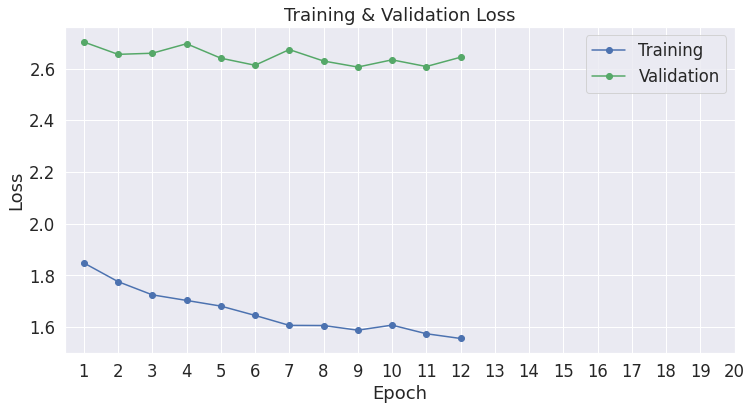

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

In [ ]:
import os


output_dir = 'IR_project_model_hyperbolic_hinge_5_2/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
# model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to IR_project_model_hyperbolic_hinge_5_2/


('IR_project_model_hyperbolic_hinge_5_2/vocab.txt',
 'IR_project_model_hyperbolic_hinge_5_2/special_tokens_map.json',
 'IR_project_model_hyperbolic_hinge_5_2/added_tokens.json')

In [ ]:
# !pip install joblib
# import joblib
# joblib.dump(LE, "label_encoder")


In [ ]:
import json
torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))


In [ ]:
# with open(os.path.join(output_dir, 'model_config.json'), 'w') as f:
#     json.dump(model.config, f)

In [ ]:
!zip -r IR_project_model_hyperbolic_hinge_5_2.zip IR_project_model_hyperbolic_hinge_5_2/
files.download('IR_project_model_hyperbolic_hinge_5_2.zip')

updating: IR_project_model_hyperbolic_hinge_5_2/ (stored 0%)
updating: IR_project_model_hyperbolic_hinge_5_2/tokenizer_config.json (stored 0%)
updating: IR_project_model_hyperbolic_hinge_5_2/model_weights (deflated 7%)
updating: IR_project_model_hyperbolic_hinge_5_2/special_tokens_map.json (deflated 40%)
updating: IR_project_model_hyperbolic_hinge_5_2/vocab.txt (deflated 53%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp IR_project_model_hyperbolic_hinge_5_1.zip "/content/drive/My Drive/Information_retrieval_project/"

In [ ]:
# !zip -r label_encoder_categorized_reduced.zip label_encoder
# files.download('label_encoder_categorized_reduced.zip')

In [71]:
test_features = test_features.values
labels = test_labels.values

In [72]:
test_features

array(["Robert is a fisherman who wants to find a way to catch more fish. He decided to try different sizes of hooks. Robert caught 4 catfish, 3 trout, and 7 perch while using worms for bait. Which is the independent (manipulated) variable in Robert's investigation? (A) type of bait (B) size of hook (C) type of fish caught (D) number of fish caught",
       'Which of these factors causes water to evaporate the fastest? (A) high temperatures (B) high humidity (C) slow winds (D) slow runoff',
       'Which statement is true about the particles of a liquid compared to the particles of a gas? (A) Particles of a liquid are a slower and further apart. (B) Particles of a liquid are faster and farther apart. (C) Particles of a liquid are slower and closer together. (D) Particles of a liquid are faster and closer together.',
       ...,
       'Which of these is not an inherited trait in humans? (A) height (B) hair color (C) skin color (D) intelligence',
       'In order to survive, all animals

In [73]:
labels

array(['science_INFERENCE_experiment design',
       'matter_Change of state_EVAPoration', 'matter_chemistry_atomic',
       ..., 'Life_reproduction_DNA inheritance_inheritance',
       'Life_functions_FUNCT_animalESS', 'EARTH_INNER_PLATE_CONTDRIFT'],
      dtype=object)

In [74]:
len(list(set(labels)))

352

In [75]:

# course_taxonomy
test_labels = list(set(labels))
poincare_emb_data = get_poincare_embeddings_data(test_labels)

In [76]:
poincare_embedding =  [exponential_map(np.expand_dims( np.hstack(  [ poincare_model.kv.get_vector(str(x)) for x in taxonomy ] ),axis=0)) for taxonomy in poincare_emb_data ]
np.linalg.norm(poincare_embedding[311])

0.9015564724723343

In [77]:
max_val = 0
max_emb =None
for embedding in poincare_embedding:
  val = embedding.shape[1]
  if val >max_val:
    max_val=val
    max_emb =embedding
max_val


140

In [78]:
concatenated_embedding = []
for embedding in poincare_embedding:
  if embedding.shape[1] < max_val_train:
    new_embedding = np.append(embedding, np.expand_dims(np.zeros(max_val_train-embedding.shape[1]),axis=0),axis=1)
  else:
    new_embedding = embedding
  concatenated_embedding.append(np.squeeze(new_embedding,axis=0))



In [79]:
poincare_embeddings_final = np.stack(concatenated_embedding, axis=0)
poincare_embeddings_final.shape

(352, 160)

In [80]:
# model2 = MulticlassClassifier('bert-base-uncased')
# model2.load_state_dict(torch.load('model_hyperbolic_round_2/model_weights'))
# model2.cuda()

In [81]:
test_input_ids = []
test_attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    test_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
# labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  
test_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)

# Create the DataLoader.
# prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_poincare_tensor)
# prediction_sampler = SequentialSampler(prediction_data)
# prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [82]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
test_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)


In [83]:
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
def dist_without_grad( u, v):
  sqdist = torch.sum((u - v) ** 2, dim=-1)
  squnorm = torch.sum(u ** 2, dim=-1)
  sqvnorm = torch.sum(v ** 2, dim=-1)
  x = 1 + 2 * sqdist / ((1 - squnorm) * (1 - sqvnorm)) + 1e-7
  z = torch.sqrt(x ** 2 - 1)
  return torch.log(x + z)

In [84]:
test_labels = np.array(test_labels)

In [85]:
def precision(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(k)
    return result

def recall(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(len(act_set))
    return result

In [ ]:
import joblib
joblib.dump(test_labels,'test_labels')
joblib.dump(test_poincare_tensor.cpu().numpy(),'test_tensor_indexed')

['test_tensor_indexed']

In [201]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()
input_ids = test_input_ids.to('cuda')
attention_masks = test_attention_masks.to('cuda')
test_poincare_tensor = test_poincare_tensor.to('cuda')
# Tracking variables 
predictions , true_labels = [], []
for input_id,attention_mask in zip(input_ids, attention_masks):
  with torch.no_grad():
    outputs = model(input_id.reshape(1,-1),attention_mask.reshape(1,-1))
  distances,indices = torch.topk(dist_without_grad(outputs,test_poincare_tensor),20,largest=False)
  predictions.append(test_labels[indices.cpu().numpy()])
print(len(predictions))
  # max_distance =100000000000000
  # label=None
  # for index,test_poincare in enumerate(test_poincare_tensor):

  #   distance = distanceTo(test_poincare, outputs)
  #   if distance < max_distance:
  #     max_distance = distance
  #     label = index
  # predictions.append(labels[label])
    
# Predict 
# for batch in prediction_dataloader:
#   # Add batch to GPU
#   batch = tuple(t.to(device) for t in batch)
  
#   # Unpack the inputs from our dataloader
#   b_input_ids, b_input_mask, b_labels = batch
  
#   # Telling the model not to compute or store gradients, saving memory and 
#   # speeding up prediction
#   with torch.no_grad():
#       # Forward pass, calculate logit predictions
#       outputs = model(b_input_ids,b_input_mask)

#   logits = outputs
#   for logit in logits:
#     max_similarity = 0


#   # Move logits and labels to CPU
#   logits = logits.detach().cpu().numpy()
#   label_ids = b_labels.to('cpu').numpy()
  
#   # Store predictions and true labels
#   predictions.append(logits)
#   true_labels.append(label_ids)

print('    DONE.')
# predictions

Predicting labels for 1,400 test sentences...


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


1400
    DONE.


In [202]:
!pip install tensorflow==1.13.1

In [203]:
labels=test_data['QCLabel'].values

In [204]:
from sklearn .preprocessing import LabelEncoder
LE= LabelEncoder()
labels = LE.fit_transform(labels)
labels

array([349, 282, 299, ..., 194, 137,  23])

In [205]:
labels

array([349, 282, 299, ..., 194, 137,  23])

In [206]:
final_predictions = []
for prediction in predictions:
  final_predictions.append(LE.transform(prediction))


In [207]:
final_predictions[0]

array([338, 349, 346, 343, 347, 345, 337, 339, 344, 340, 350, 342, 348,
       341,  86, 335, 336, 351, 228,  77])

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [ ]:
test_data[test_data["QCLabel"]=="matter_properties of material_REFLECT"]

,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,grade,year,QCLabel,Question,subject,category,fold
498,Mercury_7132038,7132038,1,A,1,0,Mercury,7,2015,matter_properties of material_REFLECT,What would be the best evidence that two subst...,NaN,Train,Challenge
644,Mercury_SC_400861,400861,1,B,1,0,Mercury,5,2015,matter_properties of material_REFLECT,Which object best reflects light? (A) gray doo...,NaN,Train,Easy
1102,NYSEDREGENTS_2014_4_13,13,1,B,1,0,NYSEDREGENTS,4,2014,matter_properties of material_REFLECT,A boy can see his face when he looks into a ca...,NaN,Dev,Challenge


In [ ]:
final_predictions[644]

array([246, 249, 247, 244, 243, 248, 254, 245, 241, 253])

In [ ]:
final_predictions[644]

array([246, 249, 247, 244, 243])

In [ ]:
LE.inverse_transform([246, 249, 247, 244, 243, 248, 254, 245, 241, 253])

array(['energy_LIGHT_REFLECT', 'energy_LIGHT_electromagnetic spectrum',
       'energy_LIGHT_REFRACT', 'energy_LIGHT_COLINCOL',
       'energy_LIGHT_ABSORPTION', 'energy_LIGHT_SPEED',
       'energy_SOUND_SPEED', 'energy_LIGHT_GENERICPROP',
       'energy_FORMS_HEAT', 'energy_SOUND_GENERICPROP'], dtype=object)

In [ ]:
test_data.iloc[644,:]

questionID                                                  Mercury_SC_400861
originalQuestionID                                                     400861
totalPossiblePoint                                                          1
AnswerKey                                                                   B
isMultipleChoiceQuestion                                                    1
includesDiagram                                                             0
examName                                                              Mercury
grade                                                                       5
year                                                                     2015
QCLabel                                 matter_properties of material_REFLECT
Question                    Which object best reflects light? (A) gray doo...
subject                                                                   NaN
category                                                        

In [ ]:
test_data.iloc[1102,:]

questionID                                             NYSEDREGENTS_2014_4_13
originalQuestionID                                                         13
totalPossiblePoint                                                          1
AnswerKey                                                                   B
isMultipleChoiceQuestion                                                    1
includesDiagram                                                             0
examName                                                         NYSEDREGENTS
grade                                                                       4
year                                                                     2014
QCLabel                                 matter_properties of material_REFLECT
Question                    A boy can see his face when he looks into a ca...
subject                                                                   NaN
category                                                        

In [ ]:
final_predictions[1102]

array([318, 330, 333, 319, 322])

In [ ]:
final_predictions[1102]

array([318, 330, 333, 319, 322])

In [ ]:
LE.inverse_transform([318, 333, 330, 332, 319, 322, 328, 317, 326, 334])

array(['matter_properties of material_DENSITY',
       'matter_properties of objects_TEXT',
       'matter_properties of objects_DENSITY',
       'matter_properties of objects_TEMP',
       'matter_properties of material_ELECCOND',
       'matter_properties of material_LUSTER',
       'matter_properties of material_durability',
       'matter_properties of material_CLASS',
       'matter_properties of material_SOLUBILITY',
       'matter_properties of objects_VOL'], dtype=object)

In [ ]:
final_predictions[498]

array([290, 293, 291, 292, 289, 332, 284, 281, 333, 279])

In [ ]:
LE.inverse_transform([290, 293, 291, 292, 289, 332, 284, 281, 333, 279])

array(['matter_MIXTURES_COMPOUNDS', 'matter_MIXTURES_heterogeneous',
       'matter_MIXTURES_SEPCOMPOUNDS', 'matter_MIXTURES_SEPHETERO',
       'matter_MIXTURES_ALLOYS', 'matter_properties of objects_TEMP',
       'matter_Change of state_MELTING', 'matter_Change of state_EVAP',
       'matter_properties of objects_TEXT',
       'matter_Change of state_BOILING'], dtype=object)

In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 15
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=10)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=10)

tmp_rank = tf.nn.top_k(y_pred, 10)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))


    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1400, 10) (1400,)
update_recall:  0.6778571428571428
recall 0.6778571428571428
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 949.0, 451.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[349, 347, 346, ..., 339, 338, 337],
       [ 86,  52,  51, ...,  45,  44,  37],
       [297, 296, 295, ..., 281, 280, 279],
       ...,
       [195, 194, 193, ..., 188, 187,  86],
       [171, 162, 143, ..., 137, 136,  86],
       [ 18,  17,  16, ...,   9,   8,   7]]), indices=array([[1, 4, 2, ..., 7, 0, 6],
       [7, 4, 5, ..., 3, 9, 8],
       [1, 0, 2, ..., 3, 8, 4],
       ...,
       [7, 6, 4, ..., 2, 9, 8],
       [4, 3, 8, ..., 1, 0, 2],
       [3, 6, 4, ..., 2, 0, 1]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=20)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=20)

tmp_rank = tf.nn.top_k(y_pred, 20)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))


    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1400, 20) (1400,)
update_recall:  0.7414285714285714
recall 0.7414285714285714
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1038.0, 362.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[349, 348, 347, ..., 228,  86,  77],
       [228,  86,  52, ...,  35,  34,   1],
       [332, 331, 330, ..., 279, 278, 277],
       ...,
       [195, 194, 193, ...,  95,  87,  86],
       [228, 187, 180, ...,  96,  87,  86],
       [ 86,  44,  39, ...,   7,   6,   1]]), indices=array([[17, 10,  1, ..., 18, 14, 19],
       [18,  7,  4, ..., 10, 13, 19],
       [13, 11, 10, ...,  3,  8,  4],
       ...,
       [ 7,  6,  4, ..., 19, 15,  8],
       [14, 12, 16, ..., 18, 17,  2],
       [10, 16, 17, ...,  1, 12, 11]], dtype=int32))


In [208]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=20)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=20)

tmp_rank = tf.nn.top_k(y_pred, 15)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))


    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1400, 20) (1400,)
update_recall:  0.74
recall 0.74
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1036.0, 364.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[351, 350, 349, ..., 339, 338, 337],
       [228,  86,  52, ...,  41,  40,  39],
       [334, 333, 332, ..., 287, 285, 284],
       ...,
       [195, 194, 193, ..., 140, 139,  98],
       [228, 187, 180, ..., 138, 137, 136],
       [ 86,  44,  39, ...,  12,  11,  10]]), indices=array([[17, 10,  1, ...,  7,  0,  6],
       [18,  7,  4, ..., 11, 15, 14],
       [13, 11, 10, ..., 16,  5,  7],
       ...,
       [ 7,  6,  4, ..., 14, 10, 18],
       [14, 12, 16, ..., 11,  1,  0],
       [10, 16, 17, ...,  8,  9, 14]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 15)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 15)

tmp_rank = tf.nn.top_k(y_pred, 15)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1400, 15) (1400,)
update_recall:  0.7178571428571429
recall 0.7178571428571429
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1005.0, 395.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[348, 347, 346, ..., 336, 335,  86],
       [ 86,  52,  51, ...,  37,  35,  34],
       [332, 331, 330, ..., 279, 278, 277],
       ...,
       [195, 194, 193, ..., 140, 139,  86],
       [228, 187, 172, ..., 136, 116,  86],
       [ 86,  18,  17, ...,   7,   6,   1]]), indices=array([[10,  1, 12, ...,  0,  6, 14],
       [ 7,  4,  5, ...,  8, 10, 13],
       [13, 11, 10, ...,  3,  8,  4],
       ...,
       [ 7,  6,  4, ..., 14, 10,  8],
       [14, 12, 10, ...,  0, 13,  2],
       [10,  3,  6, ...,  1, 12, 11]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 10)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 10)

tmp_rank = tf.nn.top_k(y_pred, 10)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1400, 10) (1400,)
update_recall:  0.6778571428571428
recall 0.6778571428571428
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 949.0, 451.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[347, 345, 344, ..., 337, 336, 335],
       [ 86,  52,  51, ...,  45,  44,  37],
       [295, 294, 293, ..., 279, 278, 277],
       ...,
       [195, 194, 193, ..., 188, 187,  86],
       [171, 162, 143, ..., 137, 136,  86],
       [ 18,  17,  16, ...,   9,   8,   7]]), indices=array([[1, 4, 2, ..., 7, 0, 6],
       [7, 4, 5, ..., 3, 9, 8],
       [1, 0, 2, ..., 3, 8, 4],
       ...,
       [7, 6, 4, ..., 2, 9, 8],
       [4, 3, 8, ..., 1, 0, 2],
       [3, 6, 4, ..., 2, 0, 1]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 5)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 5)

tmp_rank = tf.nn.top_k(y_pred, 5)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1400, 5) (1400,)
update_recall:  0.535
recall 0.535
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 749.0, 651.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[348, 346, 341, 337, 335],
       [ 52,  48,  47,  46,  45],
       [295, 294, 293, 283, 279],
       ...,
       [194, 193, 191, 190, 188],
       [171, 162, 137, 136,  86],
       [ 18,  16,   9,   8,   7]]), indices=array([[3, 0, 4, 1, 2],
       [4, 3, 2, 0, 1],
       [1, 0, 2, 3, 4],
       ...,
       [2, 4, 0, 1, 3],
       [4, 3, 0, 1, 2],
       [3, 4, 2, 0, 1]], dtype=int32))


In [ ]:
def mrr_metric(labels, predictions, weights=None,
              metrics_collections=None,
              updates_collections=None,
              name=None):
    
    with tf.name_scope(name, 'mrr_metric', [predictions, labels, weights]) as scope:

    
        k = 10 #predictions.get_shape().as_list()[-1]
        print(predictions.get_shape())

        get_ranked_indicies = tf.expand_dims(tf.where(tf.equal(tf.cast(predictions,tf.int64),labels[:,None]))[:,1],1)
        rr = 1/(get_ranked_indicies+1)
        m_rr =  tf.reduce_sum(rr)/tf.cast(labels.get_shape().as_list()[0],dtype=tf.float64)

        if metrics_collections:
            tf.add_to_collection(metrics_collections, m_rr)

        if updates_collections:
            tf.add_to_collections(updates_collections, update_mrr_op)

        return m_rr,m_rr,rr

In [ ]:
mrr, update_mrr,rr = mrr_metric(y_true,y_pred)
with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("update_mrr",sess.run(update_mrr),sess.run(rr).shape)
    # print("precision",sess.run(precision))

    # print("update_recall: ",sess.run(update_recall ))
    # print("recall",sess.run(recall))

    # print("STREAM_VARS: ",(sess.run(stream_vars)))
    # print("TMP_RANK: ",sess.run(tmp_rank))

(1400, 5)
update_mrr 0.32220238095238096 (725, 1)
